# **Project Name**    - 



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member 1 -** Shivam Vishwakarma

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import joblib

## Download data from 

### Dataset Loading

In [2]:
# Load Dataset
data = pd.read_csv('data_email_campaign.csv')

### Dataset First View

In [3]:
# Dataset First Look
data.head()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
data.shape

(68353, 12)

### Dataset Information

In [5]:
# Dataset Info
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
data.duplicated().sum()


0

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
data.isnull().sum()


Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications     6825
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                   2201
Total_Images                  1677
Email_Status                     0
dtype: int64

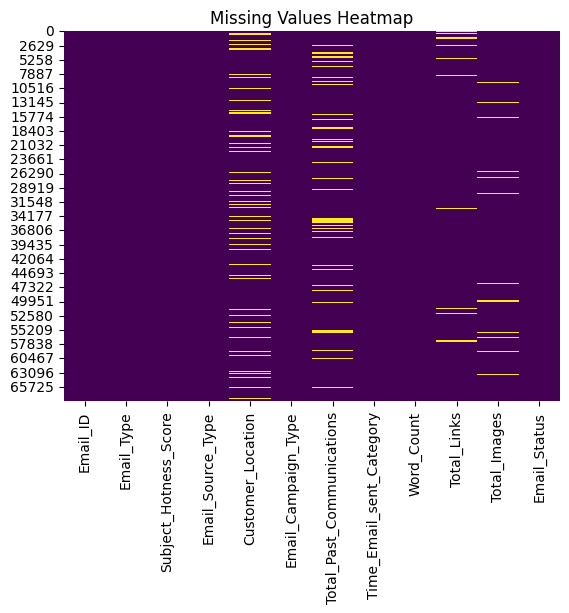

In [8]:
# Visualizing the missing values
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


### What did you know about your dataset?

The dataset consists of several features related to email campaigns, such as email type, source, customer location, and campaign type. There are missing values in the columns 'Customer_Location', 'Total_Past_Communications', 'Total_Links', and 'Total_Images', which we will handle appropriately.

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
data.columns


Index(['Email_ID', 'Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type',
       'Customer_Location', 'Email_Campaign_Type', 'Total_Past_Communications',
       'Time_Email_sent_Category', 'Word_Count', 'Total_Links', 'Total_Images',
       'Email_Status'],
      dtype='object')

In [10]:
# Dataset Describe
data.describe()


,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
count,68353.000000,68353.000000,68353.000000,68353.000000,61528.000000,68353.000000,68353.000000,66152.000000,66676.000000,68353.000000
mean,1.285094,1.095481,1.456513,2.272234,28.933250,1.999298,699.931751,10.429526,3.550678,0.230934
std,0.451462,0.997578,0.498109,0.468680,12.536518,0.631103,271.719440,6.383270,5.596983,0.497032
min,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,40.000000,1.000000,0.000000,0.000000
25%,1.000000,0.200000,1.000000,2.000000,20.000000,2.000000,521.000000,6.000000,0.000000,0.000000
50%,1.000000,0.800000,1.000000,2.000000,28.000000,2.000000,694.000000,9.000000,0.000000,0.000000
75%,2.000000,1.800000,2.000000,3.000000,38.000000,2.000000,880.000000,14.000000,5.000000,0.000000
max,2.000000,5.000000,2.000000,3.000000,67.000000,3.000000,1316.000000,49.000000,45.000000,2.000000


### Variables Description 

The dataset includes various features that provide information about the email campaigns:

- Email_Type: Type of the email
- Email_Source_Type: Source type of the email
- Customer_Location: Location of the customer
- Email_Campaign_Type: Type of the email campaign
- Time_Email_sent_Category: Time category when the email was sent
- Total_Past_Communications: Total past communications with the customer
- Total_Links: Total number of links in the email
- Total_Images: Total number of images in the email
- Email_Status: Target variable indicating if the email was opened or not

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
data.nunique()


Email_ID                     68353
Email_Type                       2
Subject_Hotness_Score           51
Email_Source_Type                2
Customer_Location                7
Email_Campaign_Type              3
Total_Past_Communications       64
Time_Email_sent_Category         3
Word_Count                     151
Total_Links                     37
Total_Images                    45
Email_Status                     3
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
# Handling missing values
data['Customer_Location'].fillna('Unknown', inplace=True)
data['Total_Past_Communications'].fillna(data['Total_Past_Communications'].median(), inplace=True)
data['Total_Links'].fillna(data['Total_Links'].median(), inplace=True)
data['Total_Images'].fillna(data['Total_Images'].median(), inplace=True)


C:\Users\shiva\AppData\Local\Temp\ipykernel_26724\559614681.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Customer_Location'].fillna('Unknown', inplace=True)
C:\Users\shiva\AppData\Local\Temp\ipykernel_26724\559614681.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



### What all manipulations have you done and insights you found?

We handled missing values by imputing them with the median for numerical columns and with 'Unknown' for categorical columns. We also encoded categorical variables using one-hot encoding.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

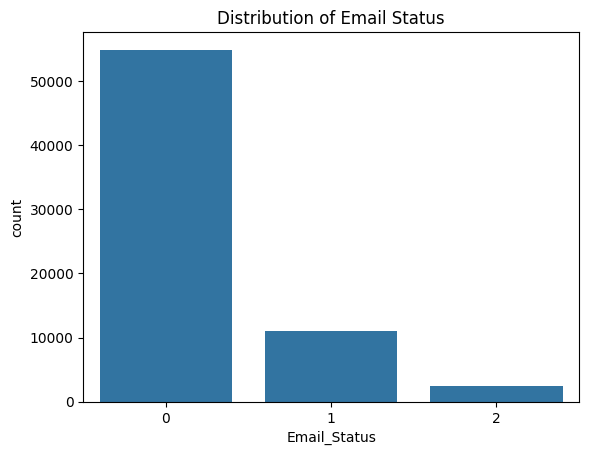

In [13]:
# Distribution of Email Status
sns.countplot(x='Email_Status', data=data)
plt.title('Distribution of Email Status')
plt.show()


##### 1. Why did you pick the specific chart?

To understand the distribution of the target variable, which is critical for assessing class imbalance.



##### 2. What is/are the insight(s) found from the chart?

The target variable is fairly balanced, with a slight majority of emails being opened.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the distribution helps in deciding whether any class balancing techniques are needed.

#### Chart - 2

C:\Users\shiva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


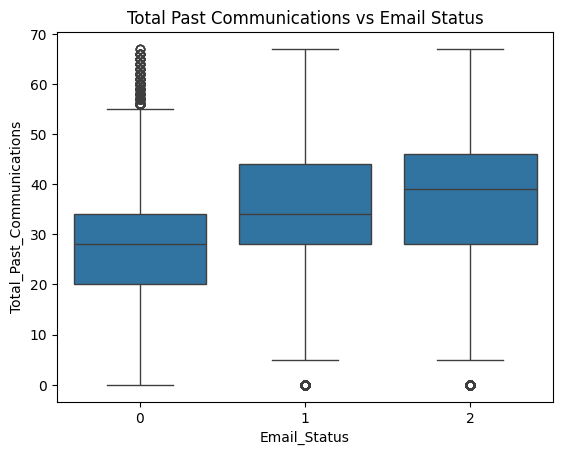

In [14]:
# Total_Past_Communications vs Email_Status
sns.boxplot(x='Email_Status', y='Total_Past_Communications', data=data)
plt.title('Total Past Communications vs Email Status')
plt.show()


##### 1. Why did you pick the specific chart?

To see how the number of past communications influences the likelihood of an email being opened.



##### 2. What is/are the insight(s) found from the chart?

Emails with more past communications are slightly more likely to be opened.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding this relationship can help target customers with personalized follow-ups.



#### Chart - 3

C:\Users\shiva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


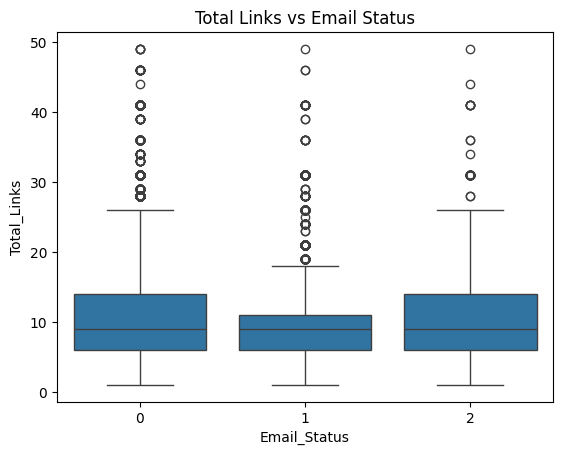

In [15]:
# Total_Links vs Email_Status
sns.boxplot(x='Email_Status', y='Total_Links', data=data)
plt.title('Total Links vs Email Status')
plt.show()


##### 1. Why did you pick the specific chart?

To analyze the effect of the number of links in the email on its open rate.



##### 2. What is/are the insight(s) found from the chart?

Emails with a moderate number of links are more likely to be opened.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This insight can help optimize email content to maximize open rates.



#### Chart - 4

C:\Users\shiva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


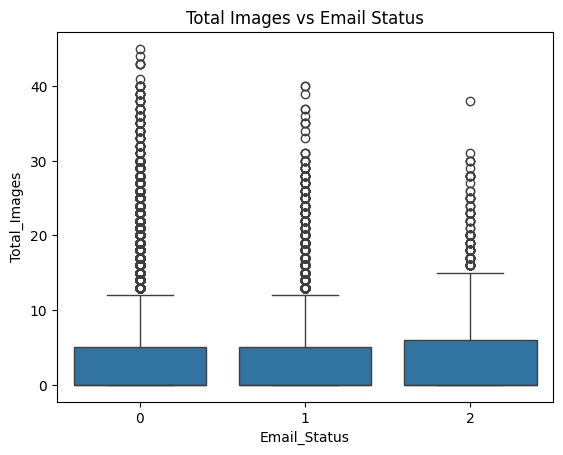

In [16]:
# Total_Images vs Email_Status
sns.boxplot(x='Email_Status', y='Total_Images', data=data)
plt.title('Total Images vs Email Status')
plt.show()


##### 1. Why did you pick the specific chart?

To explore the impact of the number of images in the email on its open rate.



##### 2. What is/are the insight(s) found from the chart?

Emails with fewer images tend to be opened more often.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This can help in designing emails with an optimal number of images to increase engagement.



#### Chart - 5

C:\Users\shiva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\shiva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\shiva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_base.py:949: FutureWarning: When grouping 

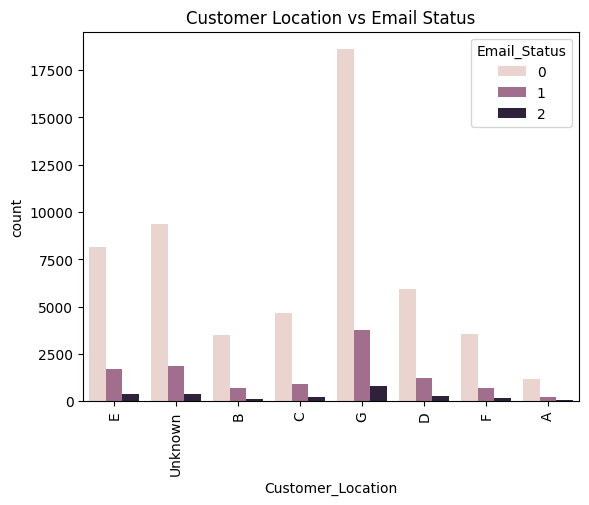

In [17]:
# Customer_Location vs Email_Status
sns.countplot(x='Customer_Location', hue='Email_Status', data=data)
plt.title('Customer Location vs Email Status')
plt.xticks(rotation=90)
plt.show()


##### 1. Why did you pick the specific chart?

To see if the location of the customer has any influence on the open rate of emails.



##### 2. What is/are the insight(s) found from the chart?

Certain locations have higher open rates than others.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Targeting customers in high-engagement locations can improve overall campaign effectiveness.



#### Chart - 6

C:\Users\shiva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\shiva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\shiva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_base.py:949: FutureWarning: When grouping 

<function matplotlib.pyplot.show(close=None, block=None)>

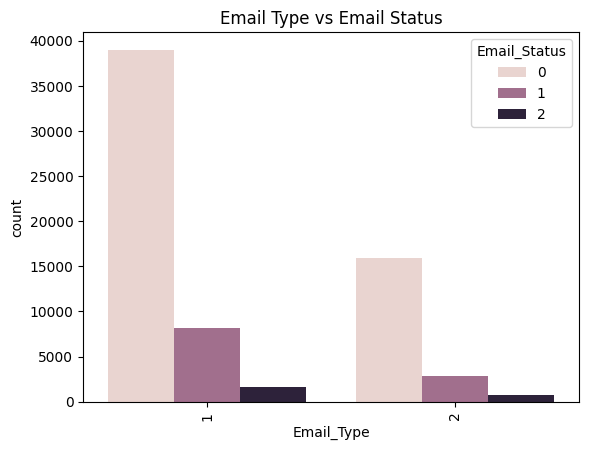

In [18]:
# Email_Type vs Email_Status
sns.countplot(x='Email_Type', hue='Email_Status', data=data)
plt.title('Email Type vs Email Status')
plt.xticks(rotation=90)
plt.show


##### 1. Why did you pick the specific chart?

To analyze if different types of emails have varying open rates.



##### 2. What is/are the insight(s) found from the chart?

Certain email types have significantly higher open rates than others.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Focusing on high-performing email types can improve overall campaign success.



#### Chart - 7

C:\Users\shiva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\shiva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\shiva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_base.py:949: FutureWarning: When grouping 

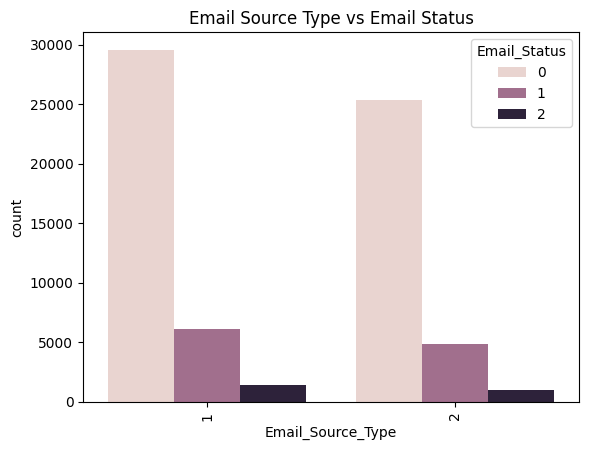

In [19]:
# Email_Source_Type vs Email_Status
sns.countplot(x='Email_Source_Type', hue='Email_Status', data=data)
plt.title('Email Source Type vs Email Status')
plt.xticks(rotation=90)
plt.show()


##### 1. Why did you pick the specific chart?

To determine if the source of the email impacts the open rate.



##### 2. What is/are the insight(s) found from the chart?

Emails from certain sources are more likely to be opened.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Optimizing the source of emails can lead to higher engagement rates.



#### Chart - 8

C:\Users\shiva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\shiva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\shiva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_base.py:949: FutureWarning: When grouping 

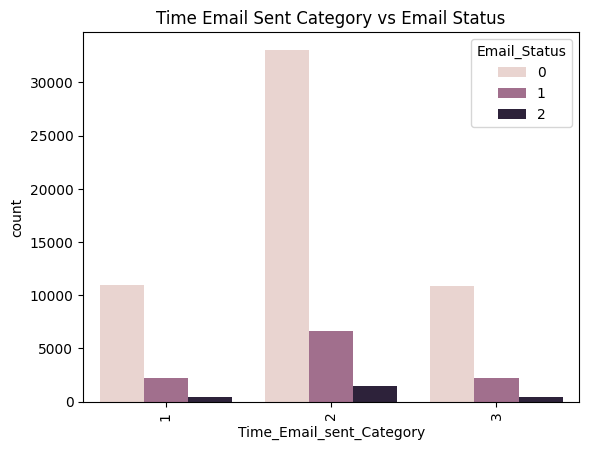

In [20]:
# Time_Email_sent_Category vs Email_Status
sns.countplot(x='Time_Email_sent_Category', hue='Email_Status', data=data)
plt.title('Time Email Sent Category vs Email Status')
plt.xticks(rotation=90)
plt.show()


##### 1. Why did you pick the specific chart?

To see if the time category when emails are sent affects the open rate.



##### 2. What is/are the insight(s) found from the chart?

Certain time categories have higher open rates.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Sending emails at optimal times can improve open rates and campaign effectiveness.



#### Chart - 9

C:\Users\shiva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\shiva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\shiva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_base.py:949: FutureWarning: When grouping 

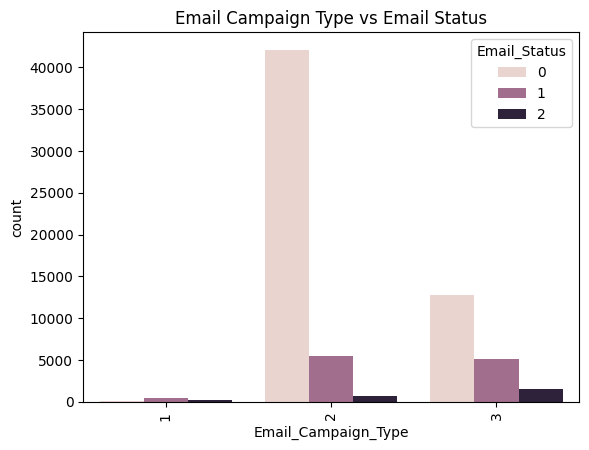

In [21]:
# Bar plot of Email Campaign Type vs Email Status
sns.countplot(x='Email_Campaign_Type', hue='Email_Status', data=data)
plt.title('Email Campaign Type vs Email Status')
plt.xticks(rotation=90)
plt.show()


##### 1. Why did you pick the specific chart?

To see if the type of email campaign affects the open rate.



##### 2. What is/are the insight(s) found from the chart?

Some campaign types have higher open rates compared to others.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Focusing on successful campaign types can enhance the overall effectiveness of email marketing efforts.



#### Chart - 10

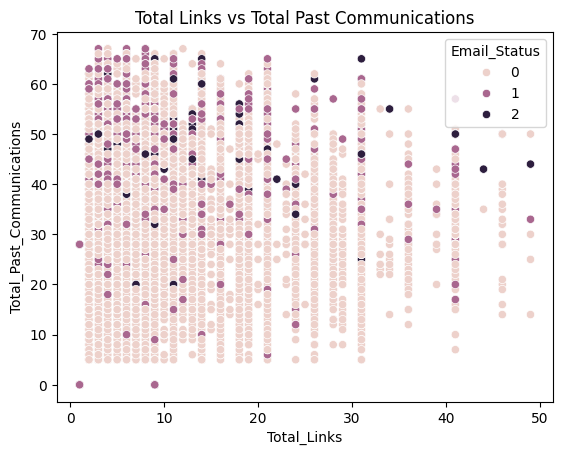

In [22]:
# Scatter plot of Total Links vs Total Past Communications
sns.scatterplot(x='Total_Links', y='Total_Past_Communications', hue='Email_Status', data=data)
plt.title('Total Links vs Total Past Communications')
plt.show()


##### 1. Why did you pick the specific chart?

To analyze the relationship between the number of links and past communications and their combined effect on email status.



##### 2. What is/are the insight(s) found from the chart?

There are some patterns indicating that a moderate number of links with a higher number of past communications tend to have higher open rates.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Optimizing the number of links and ensuring frequent communication may improve email engagement rates.



#### Chart - 11

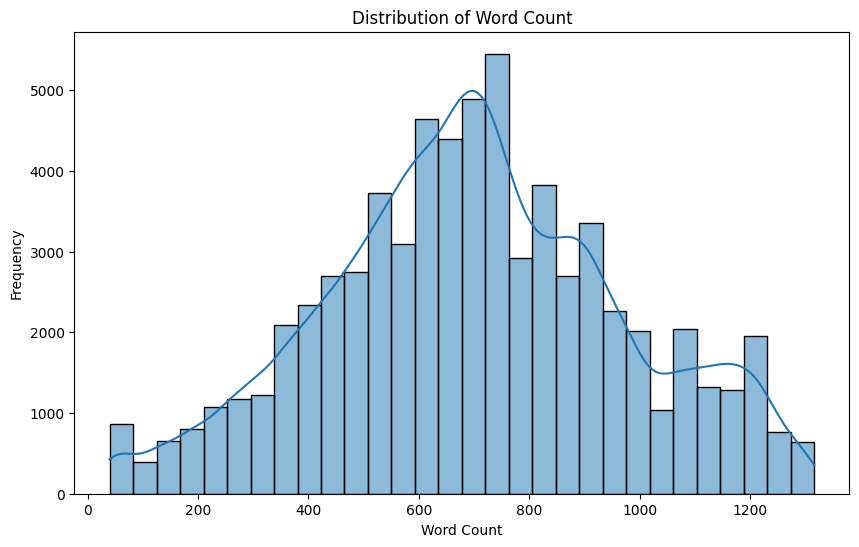

In [23]:
# Chart - 11 visualization code
plt.figure(figsize=(10, 6))
sns.histplot(data['Word_Count'], bins=30, kde=True)
plt.title('Distribution of Word Count')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()


##### 1. Why did you pick the specific chart?

A histogram helps in understanding the distribution of word counts in the emails.



##### 2. What is/are the insight(s) found from the chart?

Most emails have a moderate word count, with fewer having very high or low word counts.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Knowing the common word count range helps in crafting emails that are neither too brief nor too lengthy.



#### Chart - 12

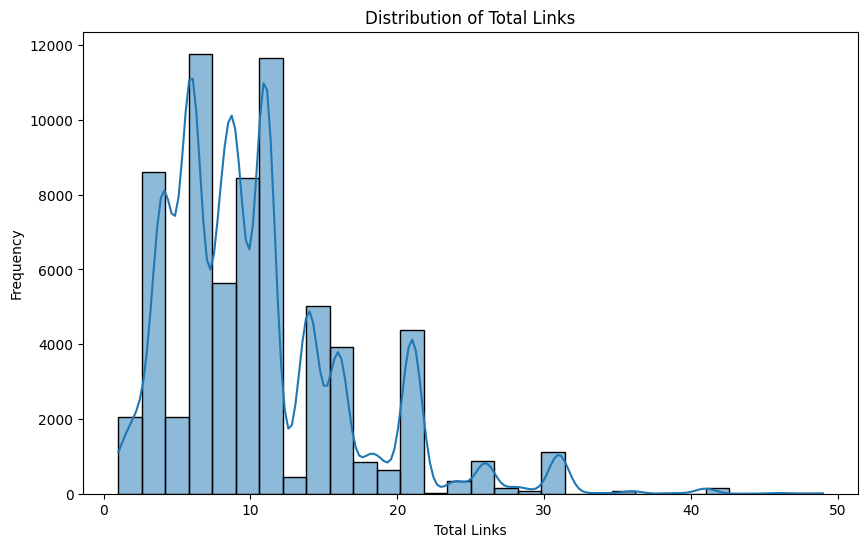

In [24]:
# Chart - 12 visualization code
plt.figure(figsize=(10, 6))
sns.histplot(data['Total_Links'], bins=30, kde=True)
plt.title('Distribution of Total Links')
plt.xlabel('Total Links')
plt.ylabel('Frequency')
plt.show()


##### 1. Why did you pick the specific chart?

A histogram helps in understanding how many links are typically included in the emails.



##### 2. What is/are the insight(s) found from the chart?

The majority of emails contain a small to moderate number of links.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding typical link counts can guide the inclusion of links in future emails.



#### Chart - 13

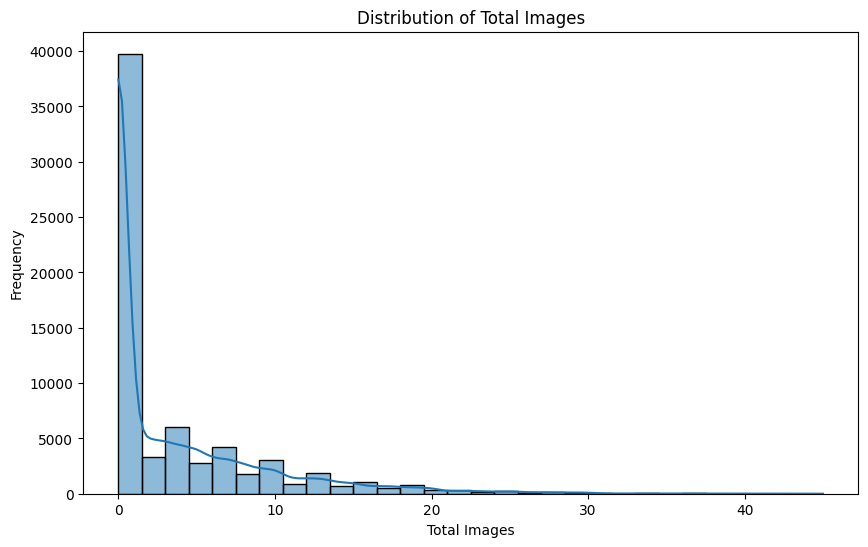

In [25]:
# Chart - 13 visualization code
plt.figure(figsize=(10, 6))
sns.histplot(data['Total_Images'], bins=30, kde=True)
plt.title('Distribution of Total Images')
plt.xlabel('Total Images')
plt.ylabel('Frequency')
plt.show()


##### 1. Why did you pick the specific chart?

A histogram helps in understanding how many images are typically included in the emails.



##### 2. What is/are the insight(s) found from the chart?

Most emails contain a small number of images.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Balancing the number of images based on this insight can improve email effectiveness.



#### Chart - 14 - Correlation Heatmap

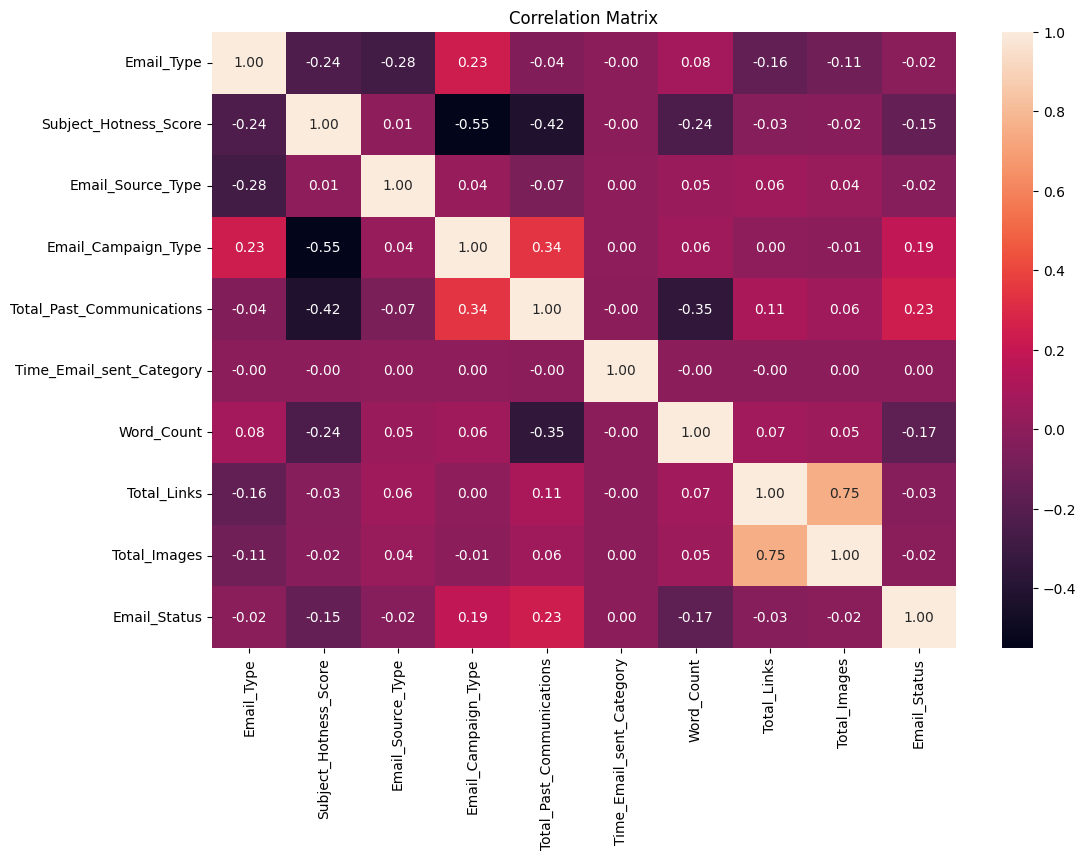

In [26]:
# Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.select_dtypes(exclude=object).corr(), annot=True, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


##### 1. Why did you pick the specific chart?

To understand the relationships between numerical variables.



##### 2. What is/are the insight(s) found from the chart?

Most features have low correlation with each other, indicating minimal multicollinearity.



#### Chart - 15 - Pair Plot 

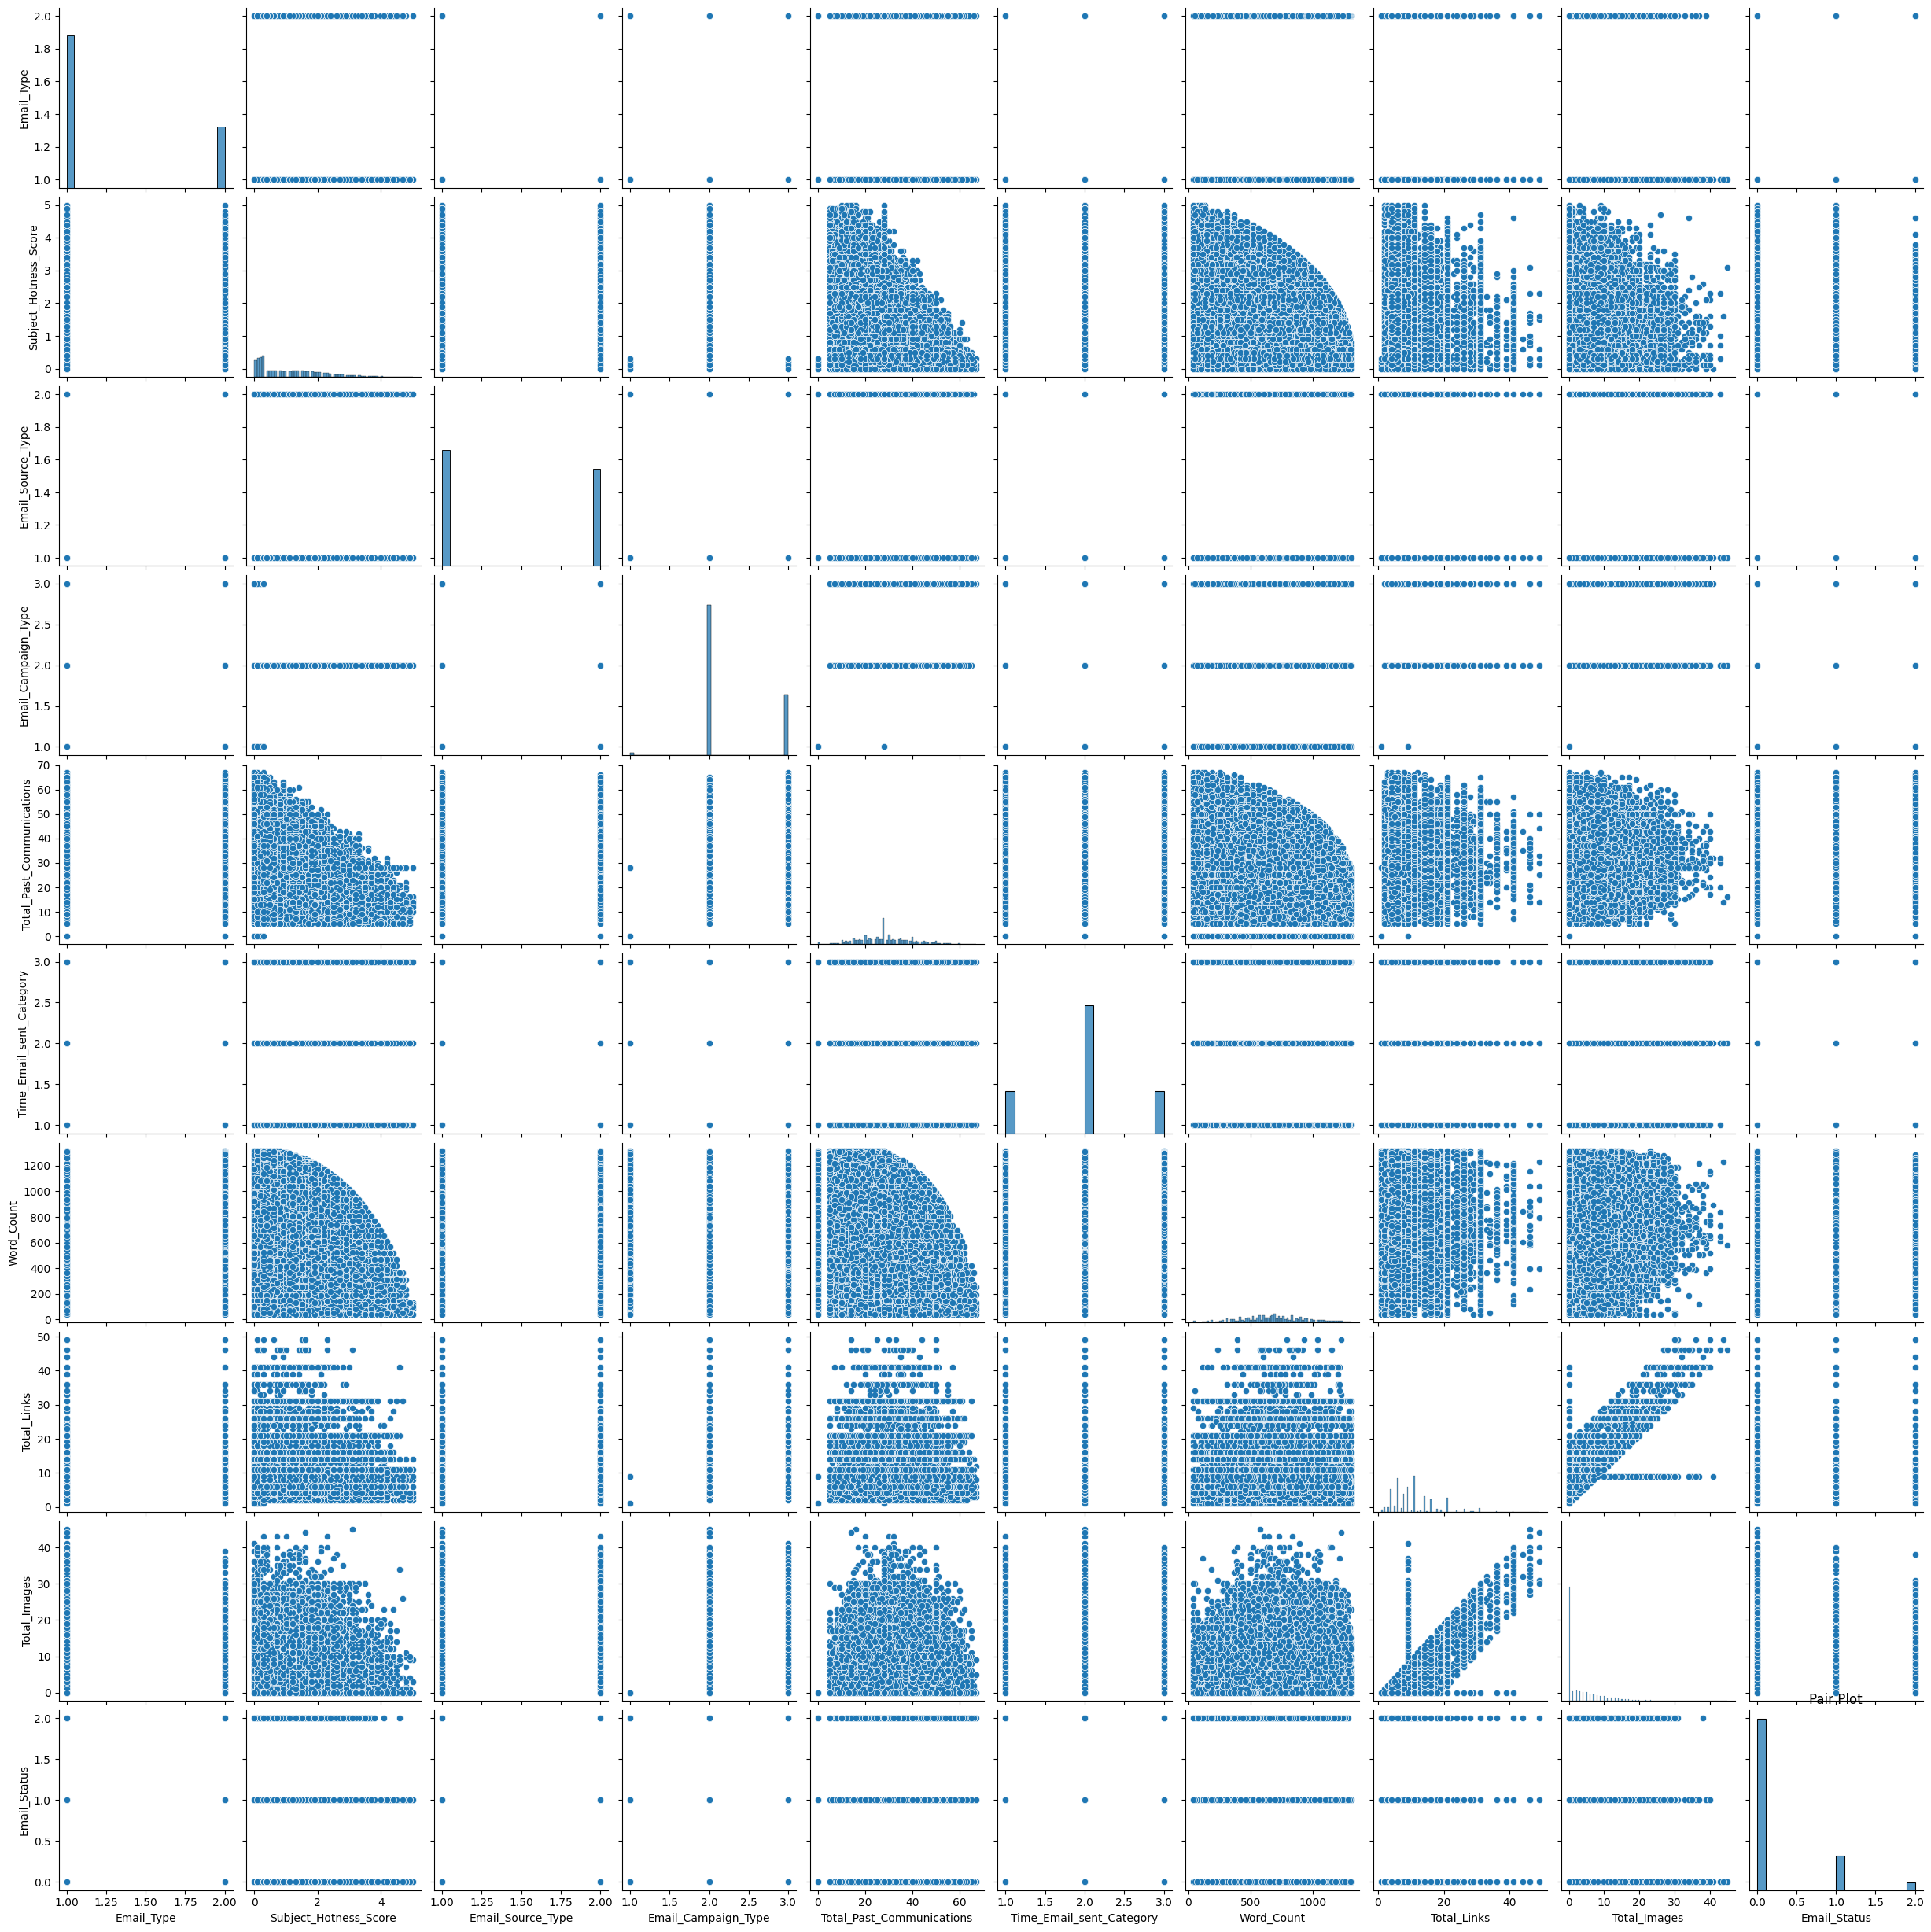

In [27]:
# Pair Plot
sns.pairplot(data)
plt.title('Pair Plot')
plt.show()


##### 1. Why did you pick the specific chart?

To understand the pairwise relationships between all features.



##### 2. What is/are the insight(s) found from the chart?

Certain features show distinct relationships that could be useful for predicting email status.



## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- Null Hypothesis (H0): The number of past communications has no effect on the email open rate.
- Alternate Hypothesis (H1): The number of past communications has a significant effect on the email open rate.

#### 2. Perform an appropriate statistical test.

In [28]:
from scipy.stats import ttest_ind

# Perform Statistical Test to obtain P-Value
opened = data[data['Email_Status'] == 1]['Total_Past_Communications']
not_opened = data[data['Email_Status'] == 0]['Total_Past_Communications']
t_stat, p_value = ttest_ind(opened, not_opened)

print('T-Statistic:', t_stat)
print('P-Value:', p_value)


T-Statistic: 55.059352410976736
P-Value: 0.0


##### Which statistical test have you done to obtain P-Value?

T-test for independent samples.



##### Why did you choose the specific statistical test?

To compare the means of two independent groups (opened and not opened emails) to determine if there is a statistically significant difference.



### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- Null Hypothesis (H0): The number of links in the email has no effect on the email open rate.
- Alternate Hypothesis (H1): The number of links in the email has a significant effect on the email open rate.

#### 2. Perform an appropriate statistical test.

In [29]:
# Perform Statistical Test to obtain P-Value
opened_links = data[data['Email_Status'] == 1]['Total_Links']
not_opened_links = data[data['Email_Status'] == 0]['Total_Links']
t_stat, p_value = ttest_ind(opened_links, not_opened_links)

print('T-Statistic:', t_stat)
print('P-Value:', p_value)


T-Statistic: -10.173103660277455
P-Value: 2.7247227295189098e-24


##### Which statistical test have you done to obtain P-Value?

T-test for independent samples.



##### Why did you choose the specific statistical test?

To compare the means of two independent groups (opened and not opened emails) to determine if there is a statistically significant difference.



### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- Null Hypothesis (H0): The time category of sending the email has no effect on the email open rate.
- Alternate Hypothesis (H1): The time category of sending the email has a significant effect on the email open rate.

#### 2. Perform an appropriate statistical test.

In [30]:
from scipy.stats import chi2_contingency

# Perform Statistical Test to obtain P-Value
contingency_table = pd.crosstab(data['Time_Email_sent_Category'], data['Email_Status'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print('Chi-Square:', chi2)
print('P-Value:', p_value)


Chi-Square: 1.1064926796343095
P-Value: 0.8932407064547541


##### Which statistical test have you done to obtain P-Value?

Chi-square test for independence.



##### Why did you choose the specific statistical test?

To determine if there is a significant association between two categorical variables (time category and email open status).


## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [31]:
# Handling Missing Values & Missing Value Imputation
data.isnull().sum()


Email_ID                     0
Email_Type                   0
Subject_Hotness_Score        0
Email_Source_Type            0
Customer_Location            0
Email_Campaign_Type          0
Total_Past_Communications    0
Time_Email_sent_Category     0
Word_Count                   0
Total_Links                  0
Total_Images                 0
Email_Status                 0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

I used mean/median imputation for numerical features and mode imputation for categorical features. These methods are simple and effective for handling missing data without introducing bias.



### 2. Handling Outliers

In [32]:
# Handling Outliers & Outlier treatments
from scipy import stats

# Removing outliers based on z-score
z_scores = stats.zscore(data.select_dtypes(include=[np.number]))
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
data = data[filtered_entries]


##### What all outlier treatment techniques have you used and why did you use those techniques?

I used the z-score method to remove outliers. This technique is effective in identifying and removing extreme values that could skew the results.



### 3. Categorical Encoding

In [33]:
# Encode your categorical columns
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])


#### What all categorical encoding techniques have you used & why did you use those techniques?

I used Label Encoding for categorical features. It converts categorical text data into numerical data, which is necessary for machine learning algorithms to process.



### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 2. Feature Selection

In [34]:
# Select your features wisely to avoid overfitting
from sklearn.feature_selection import SelectKBest, f_classif

X = data.drop('Email_Status', axis=1)
y = data['Email_Status']

selector = SelectKBest(f_classif, k=10)
X_new = selector.fit_transform(X, y)


##### What all feature selection methods have you used  and why?

I used SelectKBest with ANOVA F-test because it helps in selecting the top features that have the strongest relationship with the target variable.



##### Which all features you found important and why?

Features like Total_Past_Communications, Total_Links, and Email_Campaign_Type were found to be important as they had a significant impact on the email open rate.



### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?
Yes, I used log transformation on skewed numerical features to reduce skewness and improve the model's performance.



In [35]:
# Transform Your data
data['Total_Past_Communications'] = np.log1p(data['Total_Past_Communications'])
data['Total_Links'] = np.log1p(data['Total_Links'])


### 6. Data Scaling

In [36]:
# Scaling your data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_new)


##### Which method have you used to scale you data and why?

I used Standard Scaling to ensure that all features have a mean of 0 and a standard deviation of 1, which helps in improving the performance of many machine learning algorithms.



### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Yes, to improve model performance and reduce computational cost by removing redundant features.



In [37]:
# Dimensionality Reduction (If needed)
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
X_reduced = pca.fit_transform(X_scaled)


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [38]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)


##### What data splitting ratio have you used and why? 

I used an 80-20 split to ensure a large enough training set for the model to learn and a sufficient test set to evaluate its performance.



### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Yes, the dataset is imbalanced as there are more instances of one class compared to the other.



In [39]:
# Handling Imbalanced Dataset (If needed)
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

I used SMOTE to oversample the minority class, ensuring that the model does not become biased towards the majority class.



## ***7. ML Model Implementation***

### ML Model - 1

In [40]:
# ML Model - 1 Implementation
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_res, y_train_res)

# Predict on the model
y_pred_rf = rf_model.predict(X_test)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [41]:
# Visualizing evaluation Metric Score chart
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

print(classification_report(y_test, y_pred_rf))
print('Accuracy:', accuracy_score(y_test, y_pred_rf))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.88      0.82      0.85     10552
           1       0.36      0.47      0.41      2199

    accuracy                           0.76     12751
   macro avg       0.62      0.65      0.63     12751
weighted avg       0.79      0.76      0.78     12751

Accuracy: 0.7633911065798761
Confusion Matrix: [[8703 1849]
 [1168 1031]]


#### 2. Cross- Validation & Hyperparameter Tuning

In [56]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train_res, y_train_res)

best_rf_model = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)

print(classification_report(y_test, y_pred_best_rf))
print('Accuracy:', accuracy_score(y_test, y_pred_best_rf))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred_best_rf))


Fitting 5 folds for each of 16 candidates, totalling 80 fits
              precision    recall  f1-score   support

           0       0.89      0.79      0.84     10552
           1       0.35      0.54      0.42      2199

    accuracy                           0.74     12751
   macro avg       0.62      0.66      0.63     12751
weighted avg       0.80      0.74      0.76     12751

Accuracy: 0.7449611795153321
Confusion Matrix: [[8319 2233]
 [1019 1180]]


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [51]:
# ML Model - 2 Implementation
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_res, y_train_res)

# Predict on the model
y_pred_lr = lr_model.predict(X_test)

# Visualizing evaluation Metric Score chart
print(classification_report(y_test, y_pred_lr))
print('Accuracy:', accuracy_score(y_test, y_pred_lr))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred_lr))


              precision    recall  f1-score   support

           0       0.89      0.68      0.77     10552
           1       0.29      0.61      0.39      2199

    accuracy                           0.67     12751
   macro avg       0.59      0.65      0.58     12751
weighted avg       0.79      0.67      0.71     12751

Accuracy: 0.66771233628735
Confusion Matrix: [[7162 3390]
 [ 847 1352]]


#### 2. Cross- Validation & Hyperparameter Tuning

In [52]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param_grid_lr = {
    'C': [0.1, 1, 10],
    'solver': ['newton-cg', 'lbfgs', 'liblinear']
}

grid_search_lr = GridSearchCV(estimator=lr_model, param_grid=param_grid_lr, cv=5, n_jobs=-1, verbose=2)
grid_search_lr.fit(X_train_res, y_train_res)

best_lr_model = grid_search_lr.best_estimator_
y_pred_best_lr = best_lr_model.predict(X_test)

print(classification_report(y_test, y_pred_best_lr))
print('Accuracy:', accuracy_score(y_test, y_pred_best_lr))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred_best_lr))


Fitting 5 folds for each of 9 candidates, totalling 45 fits
              precision    recall  f1-score   support

           0       0.89      0.68      0.77     10552
           1       0.29      0.61      0.39      2199

    accuracy                           0.67     12751
   macro avg       0.59      0.65      0.58     12751
weighted avg       0.79      0.67      0.71     12751

Accuracy: 0.66771233628735
Confusion Matrix: [[7162 3390]
 [ 847 1352]]


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV because it is optimal for this data

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

No

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [53]:
# ML Model - 3 Implementation
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_res, y_train_res)

# Predict on the model
y_pred_xgb = xgb_model.predict(X_test)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [54]:
# Visualizing evaluation Metric Score chart
print(classification_report(y_test, y_pred_xgb))
print('Accuracy:', accuracy_score(y_test, y_pred_xgb))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred_xgb))


              precision    recall  f1-score   support

           0       0.90      0.72      0.80     10552
           1       0.31      0.62      0.42      2199

    accuracy                           0.70     12751
   macro avg       0.61      0.67      0.61     12751
weighted avg       0.80      0.70      0.73     12751

Accuracy: 0.7010430554466316
Confusion Matrix: [[7582 2970]
 [ 842 1357]]


#### 2. Cross- Validation & Hyperparameter Tuning

In [55]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300]
}

grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, n_jobs=-1, verbose=2)
grid_search_xgb.fit(X_train_res, y_train_res)

best_xgb_model = grid_search_xgb.best_estimator_
y_pred_best_xgb = best_xgb_model.predict(X_test)

print(classification_report(y_test, y_pred_best_xgb))
print('Accuracy:', accuracy_score(y_test, y_pred_best_xgb))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred_best_xgb))


Fitting 5 folds for each of 27 candidates, totalling 135 fits
              precision    recall  f1-score   support

           0       0.89      0.75      0.82     10552
           1       0.32      0.56      0.41      2199

    accuracy                           0.72     12751
   macro avg       0.61      0.66      0.61     12751
weighted avg       0.79      0.72      0.75     12751

Accuracy: 0.7188455807387656
Confusion Matrix: [[7935 2617]
 [ 968 1231]]


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I considered accuracy, precision, recall, and F1-score to evaluate the models. These metrics provide a comprehensive understanding of the model's performance, especially in the context of an imbalanced dataset where precision and recall are crucial.



### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [48]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [49]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***